# PCA: Visualize and classify MNIST handwritten images 
ref: https://en.wikipedia.org/wiki/MNIST_database

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

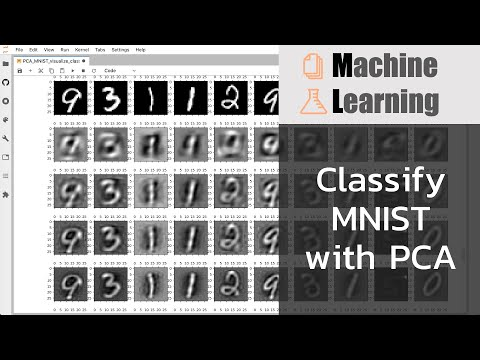

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('QIB6G0pkwmI', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-04-19 10:44:25.794705')

## read MNIST data

In [5]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
28*28

784

In [7]:
D=df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

In [8]:
784/28

28.0

n = 3631
target = 4


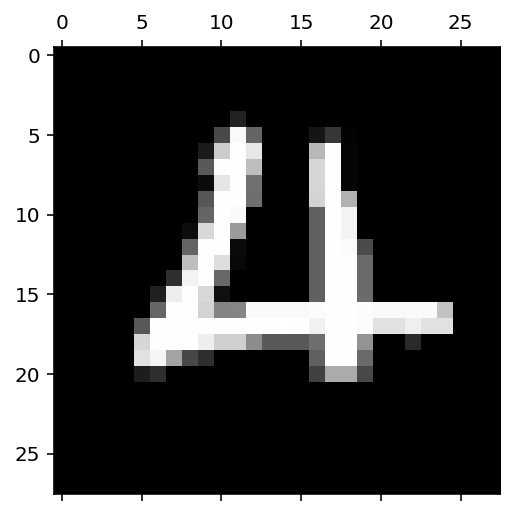

In [9]:
n=np.random.randint(0, D.shape[0])
print(f'n = {n}')
print(f"target = {df['class'].iloc[n]}")
plt.matshow(D[n].reshape(28, 28), cmap='gray')

In [10]:
df['class'].to_numpy()[:10] # target/label

array([3, 3, 1, 1, 3, 9, 1, 4, 2, 4])

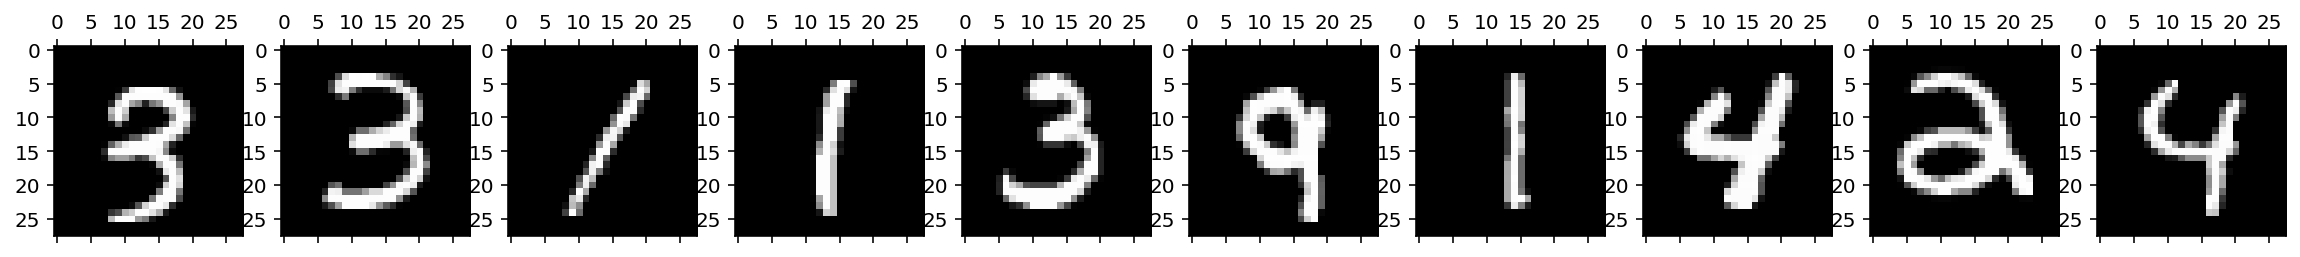

In [11]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1), cmap='gray') for i in range(n)];

## train test split

In [12]:
from sklearn.model_selection import train_test_split
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

In [13]:
X_train.shape

(4000, 784)

In [14]:
X_test.shape

(1000, 784)

In [15]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train['pixel400']

2938    197
1408      0
1556      0
4297      0
4748      0
       ... 
2054      0
1135      0
4173      0
3425    234
3345      0
Name: pixel400, Length: 4000, dtype: int64

---

## Principal Component Analysis (PCA)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

### standardized data (mean=0, sd=1)

In [18]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

#### StandardScaler (z-score)
$z=\frac{x_i-\bar{x}}{sd}$

In [19]:
scaler.mean_[321:325]

array([74.6595 , 78.47275, 88.27975, 97.70275])

In [20]:
scaler.var_[321:325]

array([10135.97755975, 10786.53875744, 11542.55048994, 11551.21339244])

In [21]:
X_train_t[:, 321].mean()

6.306066779870889e-17

In [22]:
X_train_t[:, 321].std()

1.0

In [23]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

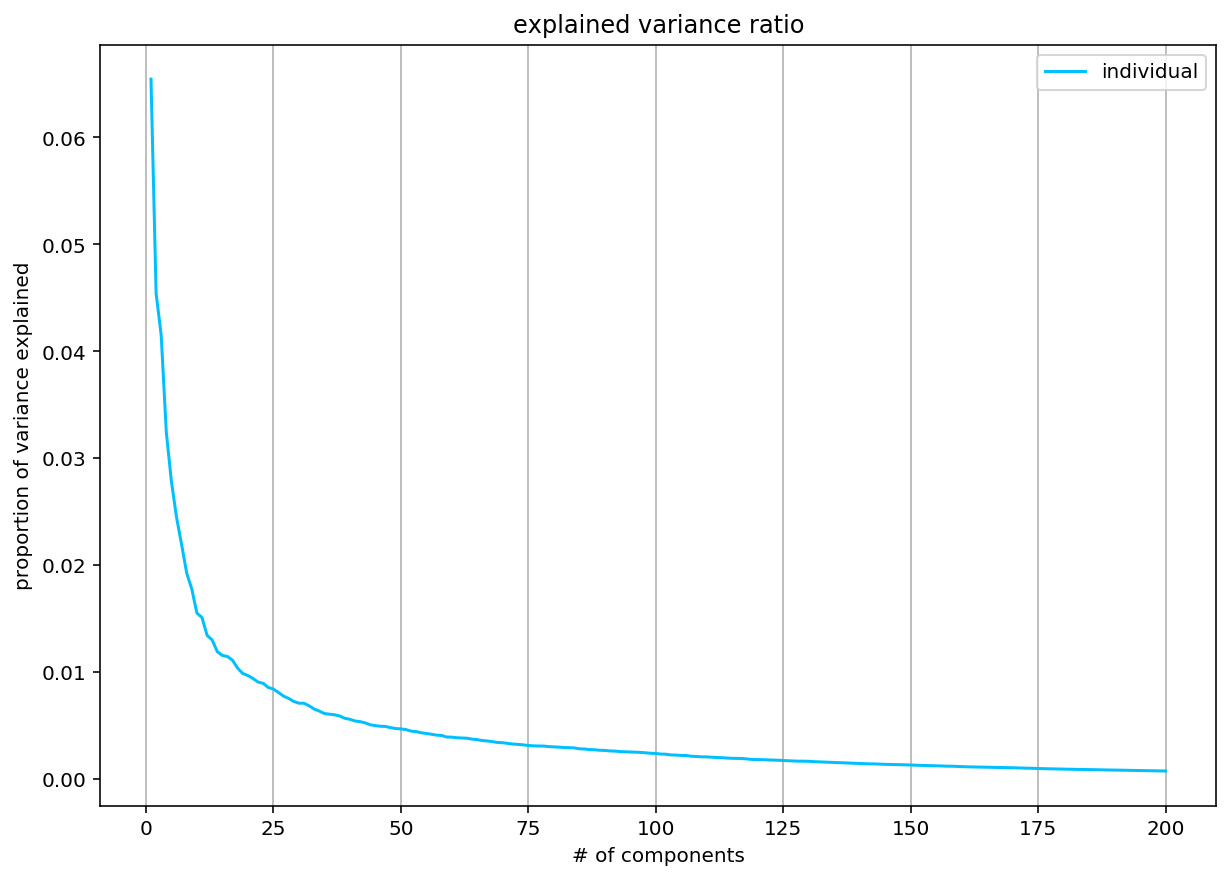

In [24]:
scree_plot(X_train, 200, False, False)

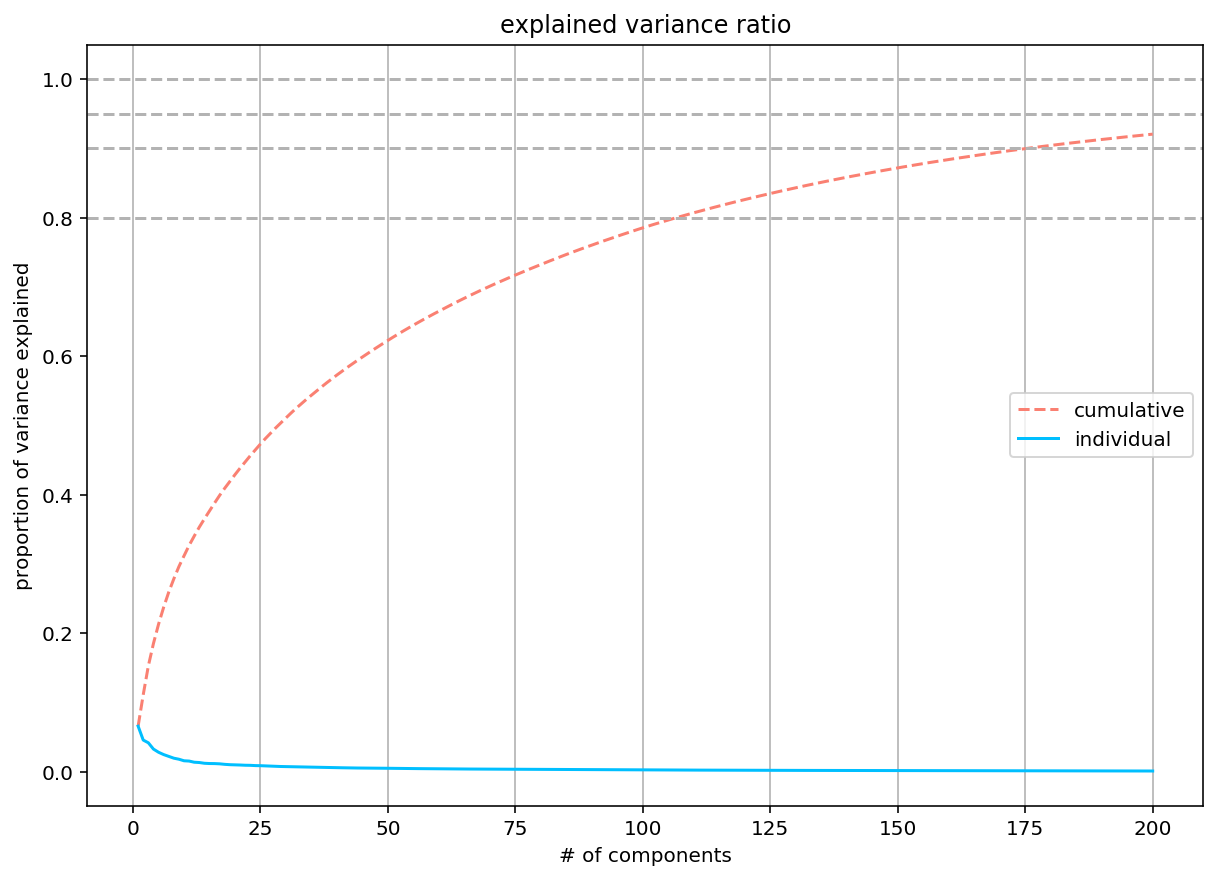

In [25]:
scree_plot(X_train, 200, True, False)

In [26]:
# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(.90)
pca = PCA(176)
# pca = PCA(n_components=784)

pca.fit(X_train_t)

PCA(copy=True, iterated_power='auto', n_components=176, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca.n_components_

176

In [28]:
X_train_pca = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t
X_test_pca = pca.transform(X_test_t) # Apply dimensionality reduction to X_test_t

In [29]:
X_train.shape

(4000, 784)

In [30]:
X_train_pca.shape

(4000, 176)

In [31]:
X_test_pca.shape

(1000, 176)

In [32]:
pca.components_.shape # Eigenvectors

(176, 784)

In [33]:
dpc=pd.DataFrame(pca.components_.T, 
                 index=X_train.columns, 
                 columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
pixel1,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
pixel2,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
pixel4,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
pixel5,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
pixel781,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
pixel782,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
pixel783,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


## compare image

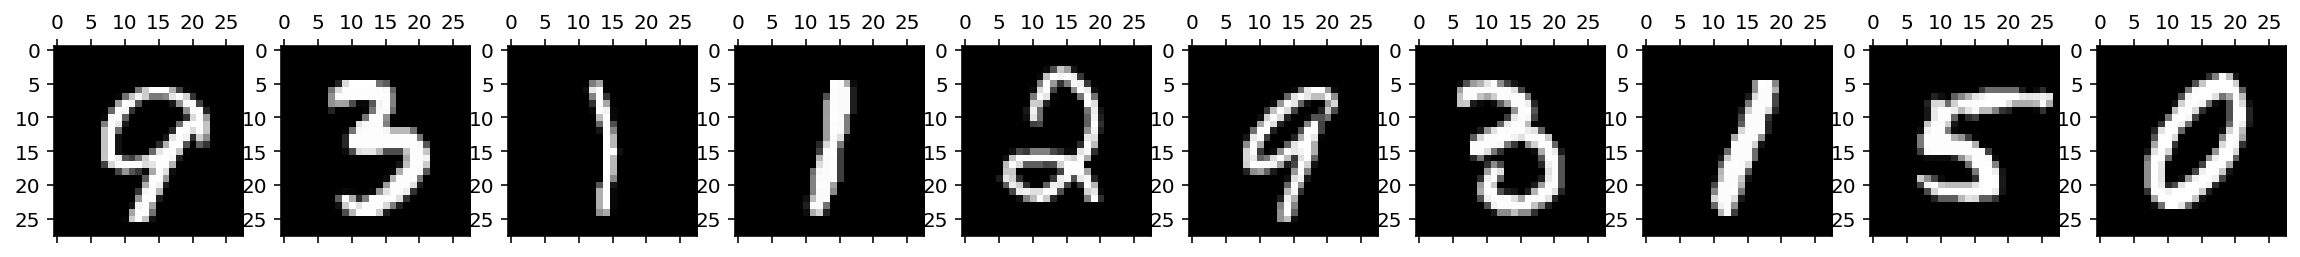

In [34]:
XT=X_train.to_numpy() # original X_train
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XT[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

In [35]:
print(f'X_train_pca.shape     = {X_train_pca.shape}')
print(f'pca.components_.shape = {pca.components_.shape}')
XP=np.dot(X_train_pca, pca.components_).round(4)
print(f'XP.shape              = {XP.shape}')
print(XP)

X_train_pca.shape     = (4000, 176)
pca.components_.shape = (176, 784)
XP.shape              = (4000, 784)
[[-0.  0. -0. ...  0.  0.  0.]
 [ 0. -0. -0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [-0. -0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]


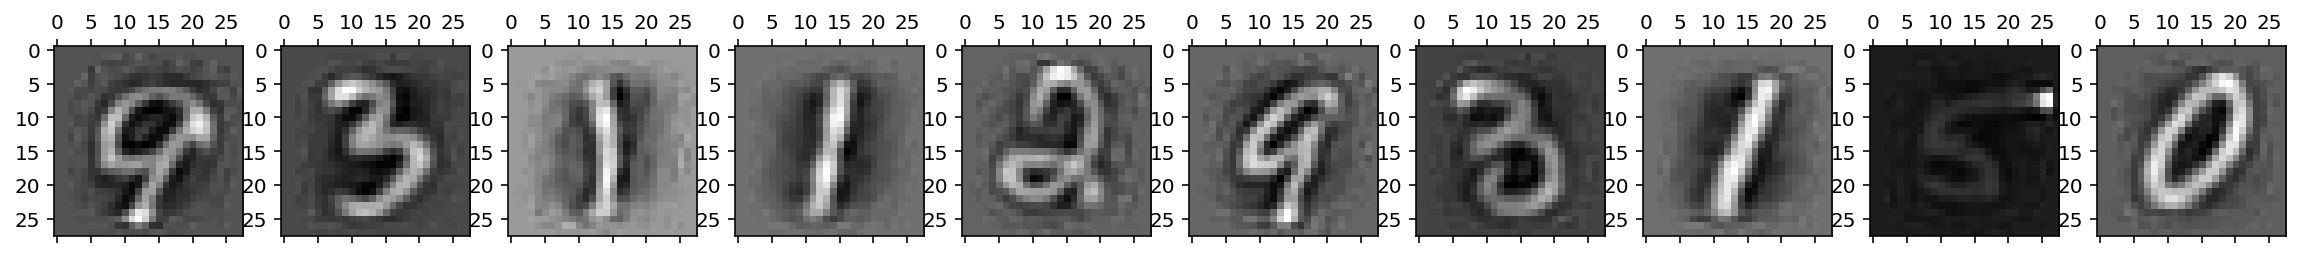

In [36]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XP[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

### compare different components

In [37]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width), cmap='gray') for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component:3}(explained variance = {np.sum(pca.explained_variance_ratio_)*100:.2f}%), {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width), cmap='gray') for i in range(n_img)]


n_component =  10(explained variance = 31.15%), (4000, 10)
n_component =  50(explained variance = 62.23%), (4000, 50)
n_component = 100(explained variance = 78.37%), (4000, 100)
n_component = 200(explained variance = 92.00%), (4000, 200)
n_component = 300(explained variance = 96.55%), (4000, 300)


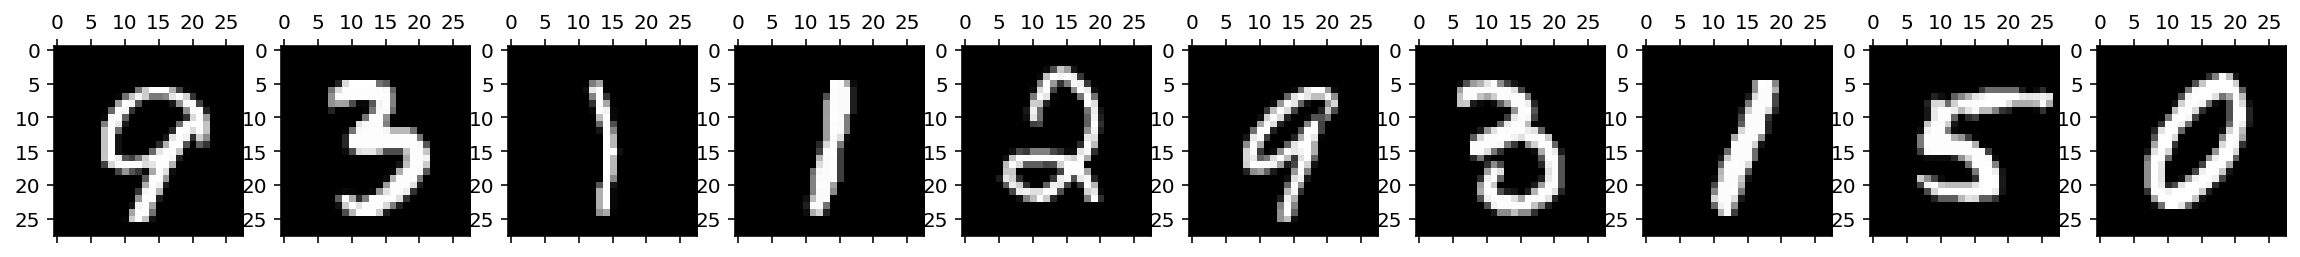

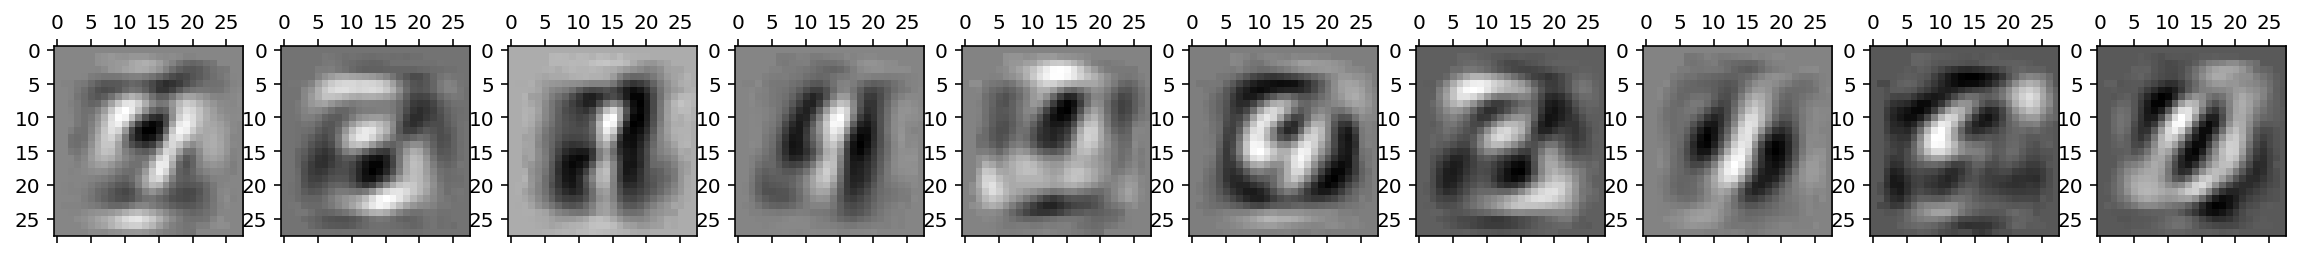

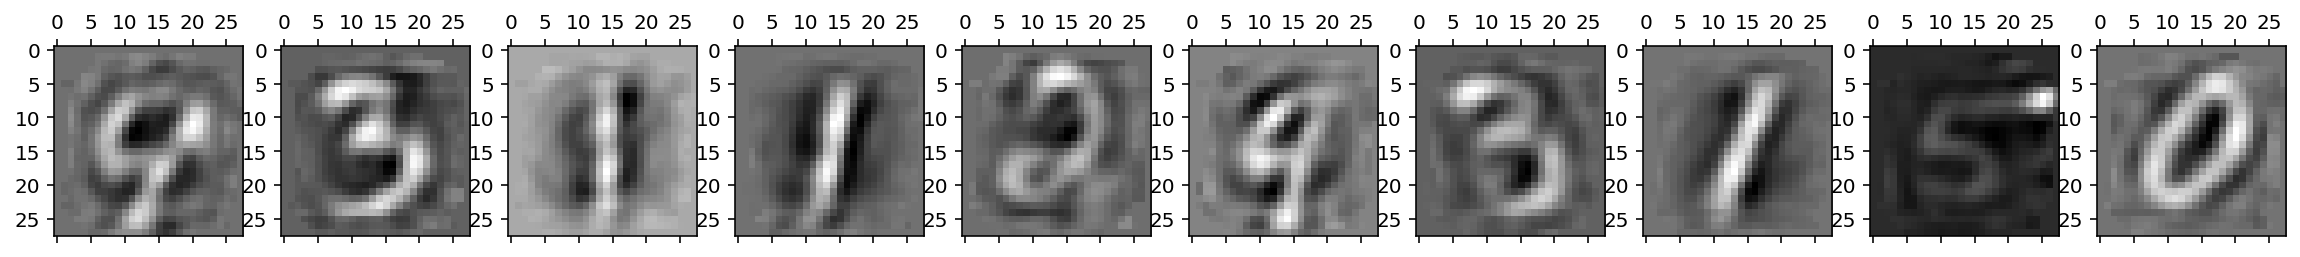

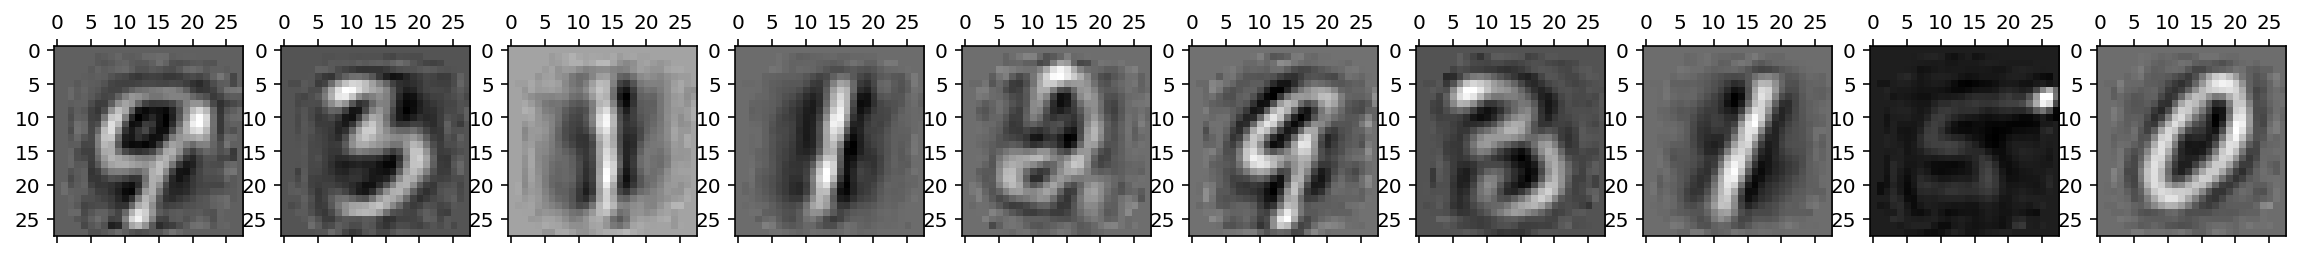

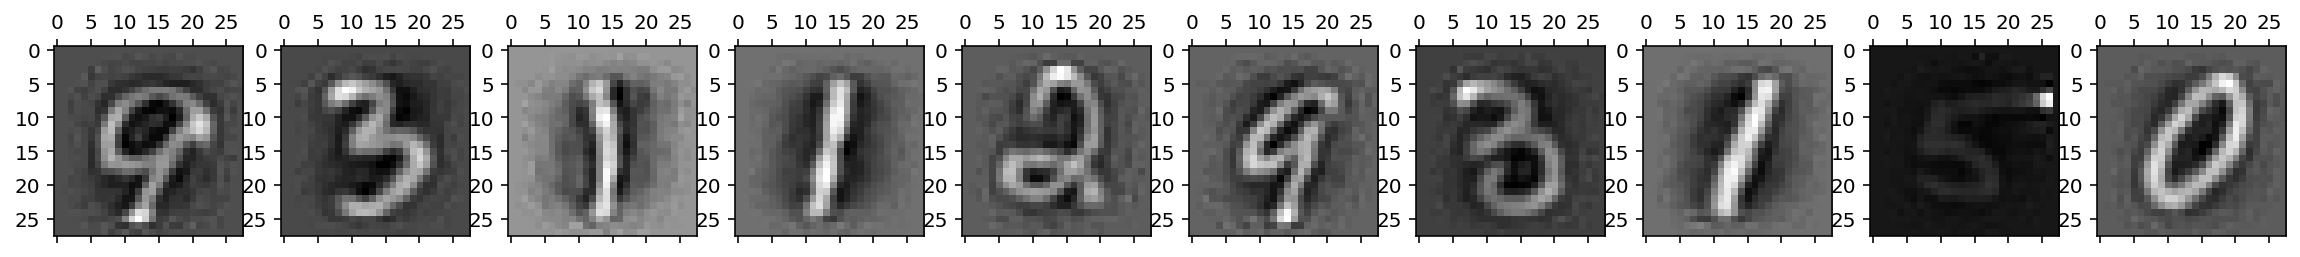

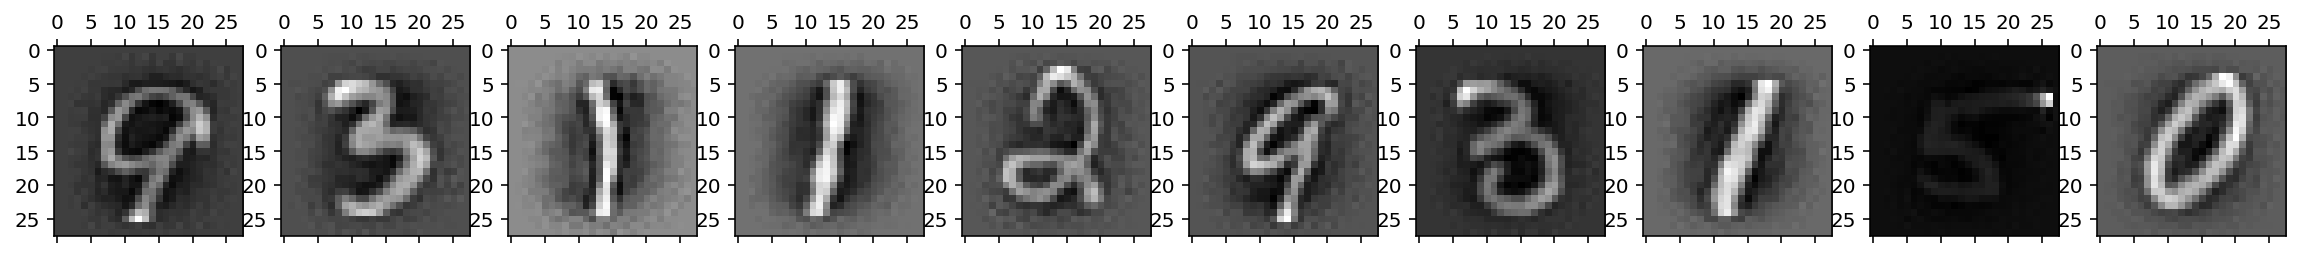

In [38]:
plot_varying_components(X_train, 10, [10, 50, 100, 200, 300], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])

## Classifier

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split

# sample of classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

In [40]:
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

### run StandardScaler (mean=0, sd=1) 

In [41]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

### classify using all features

In [42]:
model = SVC(gamma='scale')
# model = RandomForestClassifier()
model.fit(X_train_t, y_train)
train_score = model.score(X_train_t, y_train)
test_score = model.score(X_test_t, y_test)

print(f'accuracy (train) = {train_score:.4f}, accuracy (test) = {test_score:.4f}')

accuracy (train) = 0.9840, accuracy (test) = 0.9170


### classify using various reduced dimensions

In [43]:
for n in [10, 50, 100, 200, 300]:
    pca=PCA(n)
    pca.fit(X_train_t)
    X_train_pca = pca.transform(X_train_t)
    X_test_pca = pca.transform(X_test_t)
    model = SVC(gamma='scale')
#     model = RandomForestClassifier()
    model.fit(X_train_pca, y_train)
    print(f'components = {n:3}(explained variance = {np.sum(pca.explained_variance_ratio_)*100:.2f}%), accuracy (train) = {model.score(X_train_pca, y_train):.4f}, accuracy (test) = {model.score(X_test_pca, y_test):.4f}')

components =  10(explained variance = 31.15%), accuracy (train) = 0.9153, accuracy (test) = 0.8720
components =  50(explained variance = 62.22%), accuracy (train) = 0.9720, accuracy (test) = 0.9300
components = 100(explained variance = 78.38%), accuracy (train) = 0.9748, accuracy (test) = 0.9270
components = 200(explained variance = 91.99%), accuracy (train) = 0.9818, accuracy (test) = 0.9240
components = 300(explained variance = 96.55%), accuracy (train) = 0.9820, accuracy (test) = 0.9210


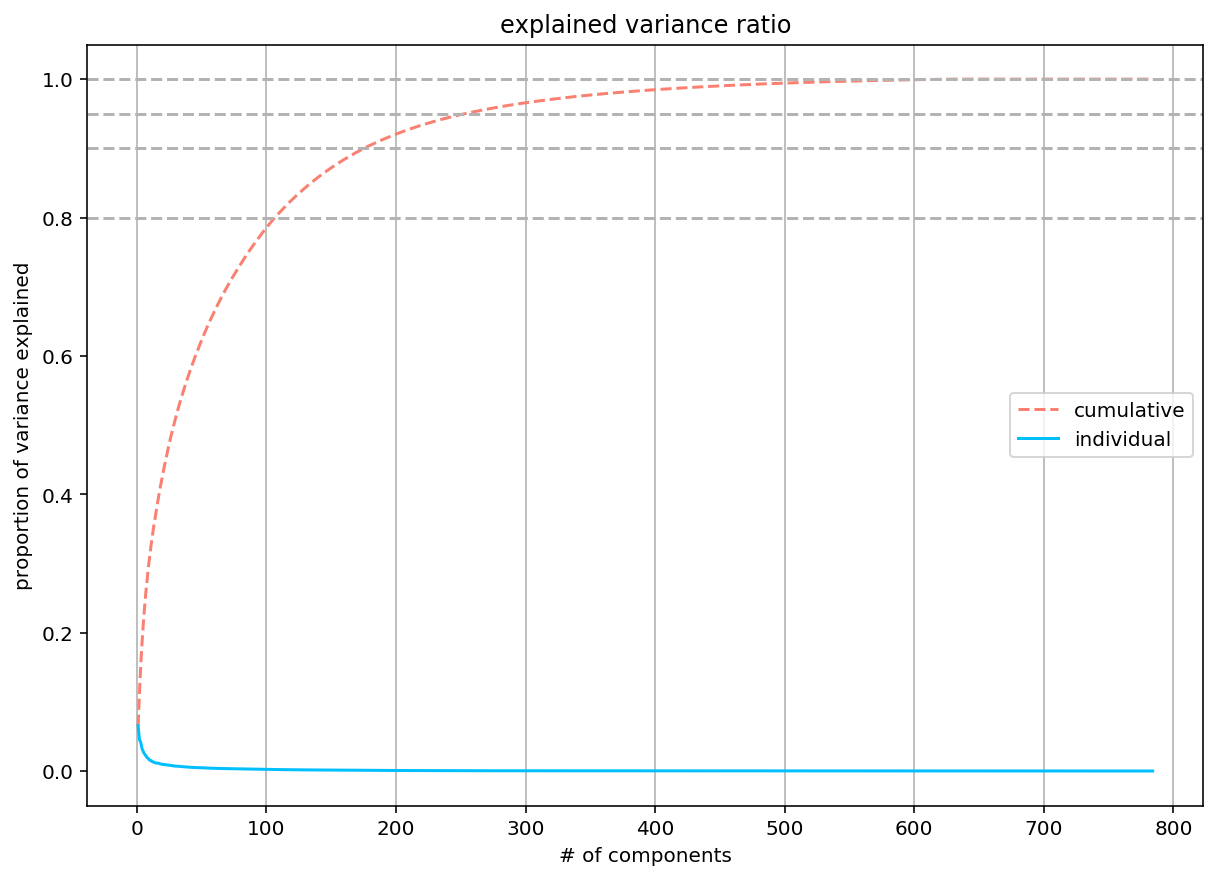

In [44]:
scree_plot(X_train, X_train.shape[1], True, False)